# Gradient vector fields
A **gradient vector field** is a vector field given as the gradient of a function.

Here we consider the gradient vector field
$\nabla f$ where $f(x) = \sigma(w\cdot x)$ for $x\in\mathbb R^2$ where $w\in\mathbb R^2$ and $\sigma$ is the sigmoid function.

We plot the vector field along with its color plot.

---
tags: pytorch, tutorial, visualization, gradient vector field, perceptron

# Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

# Linear map: $f(x) = w\cdot x$

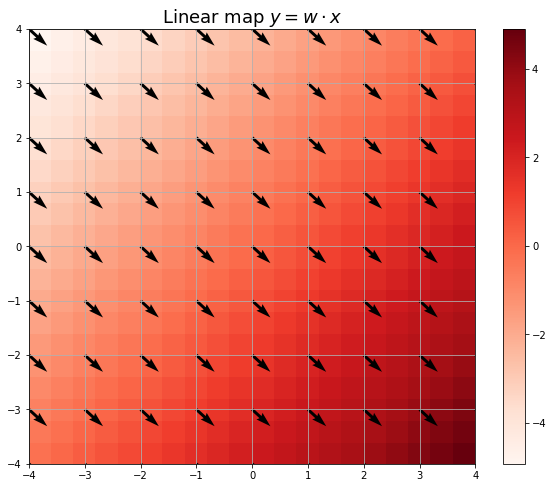

In [2]:
linear = nn.Linear(2, 1)
linear.bias.data = torch.tensor([0.])

# Pseudo-color map
x_min, x_max, y_min, y_max = -4, 4., -4., 4.
n = 21
y, x = np.mgrid[y_min:y_max:n*1j, x_min:x_max:n*1j]
x = torch.tensor(x, dtype=torch.float32, requires_grad=False)
y = torch.tensor(y, dtype=torch.float32, requires_grad=False)
xy = torch.stack([x, y], -1).reshape(n*n,2)

z = linear(xy).reshape(n, n)

# Vector field
N = 9
Y, X = np.mgrid[y_min:y_max:N*1j, x_min:x_max:N*1j]
X = torch.tensor(X, dtype=torch.float32, requires_grad=True)
Y = torch.tensor(Y, dtype=torch.float32, requires_grad=True)
XY = torch.stack([X, Y], -1).reshape(N*N,2)

Z = linear(XY)
Z.backward(torch.ones_like(Z))
gradf_X, gradf_Y = X.grad, Y.grad

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

cmesh = ax.pcolormesh(x, y, z.detach().numpy(), cmap='Reds')
ax.quiver(X.detach().numpy(), Y.detach().numpy(), gradf_X.detach().numpy(), gradf_Y.detach().numpy())
fig.colorbar(cmesh)

ax.set_title(f"Linear map $y=w\cdot x$", fontsize=18)
ax.grid();
ax;

# Perceptron: $f(x) = \sigma(w\cdot x)$
We set the bias $b$ to $0$ simply for normalization.

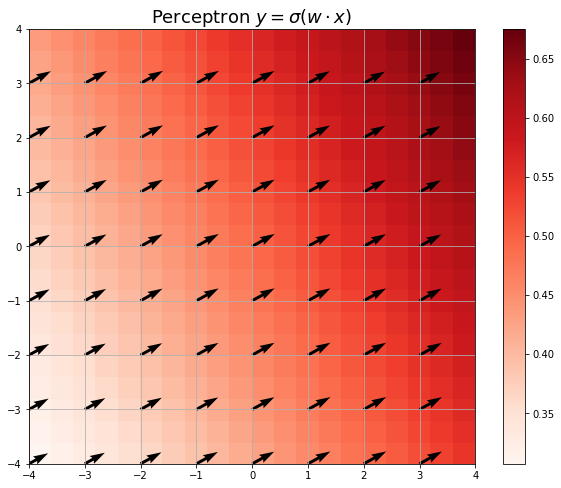

In [3]:
linear = nn.Linear(2, 1)
linear.bias.data = torch.tensor([0.])

# Pseudo-color map
n = 21
y, x = np.mgrid[y_min:y_max:n*1j, x_min:x_max:n*1j]
x = torch.tensor(x, dtype=torch.float32, requires_grad=False)
y = torch.tensor(y, dtype=torch.float32, requires_grad=False)
xy = torch.stack([x, y], -1).reshape(n*n,2)

z = linear(xy).sigmoid().reshape(n, n)

# Vector field
N = 9
Y, X = np.mgrid[y_min:y_max:N*1j, x_min:x_max:N*1j]
X = torch.tensor(X, dtype=torch.float32, requires_grad=True)
Y = torch.tensor(Y, dtype=torch.float32, requires_grad=True)
XY = torch.stack([X, Y], -1).reshape(N*N,2)

Z = linear(XY).sigmoid()
Z.backward(torch.ones_like(Z))
gradf_X, gradf_Y = X.grad, Y.grad

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

cmesh = ax.pcolormesh(x, y, z.detach().numpy(), cmap='Reds')
ax.quiver(X.detach().numpy(), Y.detach().numpy(), gradf_X.detach().numpy(), gradf_Y.detach().numpy())
fig.colorbar(cmesh)

ax.set_title(f"Perceptron $y=\sigma(w\cdot x)$ ", fontsize=18)
ax.grid();
ax;